### Importing Libraries

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing data

In [193]:
train=pd.read_csv('BlackFridayTrain.csv')
test=pd.read_csv('BlackFridayTest.csv')

**Columns and what they mean**
* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation (Masked)
* City_Category:	Category of the City (A,B,C)
* Stay_In_Current_City_Years:	Number of years stay in current city
* Marital_Status:	Marital Status
* Product_Category_1:	Product Category (Masked)
* Product_Category_2:	Product may belongs to other category also (Masked)
* Product_Category_3:	Product may belongs to other category also (Masked)
* Purchase:	Purchase Amount (Target Variable)

In [194]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [195]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [196]:
print('train:',train.shape)
print('test:',test.shape)

train: (550068, 12)
test: (233599, 11)


### Combining the data


In [197]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [198]:
df.shape

(783667, 12)

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Categorical cloumns are : Product_ID, Gender, Age, City, Stay In Current City Years. Few of these can be converted to numerical values.

In [200]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Unique values

In [201]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Out of 550068 data points only 5891 unique values are there in User_ID implying the same customer is buying multiple times. 

### Null Values

In [202]:
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

Product_Category_3            69.648078
Product_Category_2            31.388587
Purchase                      29.808452
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [203]:
#Since 69.6% of data is null in Product_Category_3 we will remove that column
df=df.drop('Product_Category_3',axis=1)
train=train.drop('Product_Category_3',axis=1)
test=test.drop('Product_Category_3',axis=1)

### Filling the null values

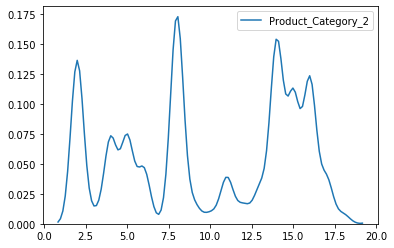

In [204]:
sns.kdeplot(df['Product_Category_2'])
plt.show()

We will replace the null values by random values such that the distribution won't change much.

In [205]:
vc = df['Product_Category_2'].value_counts(normalize = True)
null = df['Product_Category_2'].isnull()
df.loc[null, 'Product_Category_2'] = np.random.choice(vc.index, size = null.sum(), p = vc.values)

In [206]:
# Checking if all the null values have been removed
df['Product_Category_2'].isnull().sum()

0

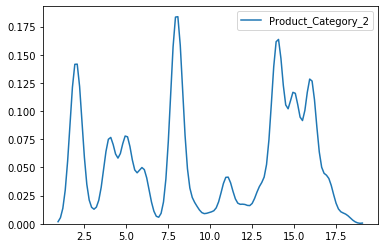

In [207]:
# Showing that the distribution have not changed
sns.kdeplot(df['Product_Category_2'])
plt.show()

### EDA


In [208]:
a=pd.crosstab(train['Age'],train['User_ID'])
a

User_ID,1000001,1000002,1000003,1000004,1000005,1000006,1000007,1000008,1000009,1000010,...,1006031,1006032,1006033,1006034,1006035,1006036,1006037,1006038,1006039,1006040
Age,,,,,,,,,,,,,,,,,,,,,
0-17,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18-25,0,0,0,0,0,0,0,0,0,0,...,31,0,0,0,0,0,0,0,0,0
26-35,0,0,29,0,106,0,0,77,58,0,...,0,0,0,12,152,514,0,0,0,180
36-45,0,0,0,0,0,0,17,0,0,223,...,0,0,0,0,0,0,0,0,0,0
46-50,0,0,0,14,0,0,0,0,0,0,...,0,55,0,0,0,0,122,0,74,0
51-55,0,0,0,0,0,47,0,0,0,0,...,0,0,36,0,0,0,0,0,0,0
55+,0,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,0,0


In [209]:
# The table shows which customer from each age group who  have purchased the maximum times.
b=pd.DataFrame()
b['Maximum Purchase Count']=a.max(axis=1).values
b['User_ID']=a.idxmax(axis=1).values
b.index=a.index
b

,Maximum Purchase Count,User_ID
Age,,
0-17,680,1001088
18-25,698,1003391
26-35,1026,1001680
36-45,979,1004277
46-50,823,1000889
51-55,502,1003292
55+,767,1003618


In [210]:
print('Customer',a.max(axis=0).idxmax(),'of age between',a.max(axis=1).idxmax(),'have purchased maximum number of times.' )

Customer 1001680 of age between 26-35 have purchased maximum number of times.


### Popular Product

In [211]:
c=pd.crosstab(train['City_Category'],train['Product_ID'])
c

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
City_Category,,,,,,,,,,,,,,,,,,,,,
A,255,83,64,36,44,134,68,9,18,135,...,16,51,2,90,144,65,4,34,19,5
B,435,181,102,38,70,210,113,17,25,236,...,13,61,2,111,180,88,6,51,50,8
C,462,112,78,18,35,168,60,10,12,132,...,4,32,3,56,116,47,3,41,33,1


In [212]:
d=pd.DataFrame()
d['Maximum Purchase Count']=c.max(axis=1).values
d['Product_ID']=c.idxmax(axis=1).values
d.index=c.index
d

,Maximum Purchase Count,Product_ID
City_Category,,
A,401,P00265242
B,634,P00265242
C,845,P00265242


In [213]:
# The popular product in each age group along with their count
a=pd.crosstab(train['Age'],train['Product_ID'])
b=pd.DataFrame()
b['Maximum Purchase Count']=a.max(axis=1).values
b['Product_ID']=a.idxmax(axis=1).values
b.index=a.index
b

,Maximum Purchase Count,Product_ID
Age,,
0-17,65,P00255842
18-25,389,P00265242
26-35,746,P00265242
36-45,356,P00025442
46-50,138,P00265242
51-55,140,P00265242
55+,104,P00265242


In [214]:
# The popular product according to Marital_Status along with their count
a=pd.crosstab(train['Marital_Status'],train['Product_ID'])
b=pd.DataFrame()
b['Maximum Purchase Count']=a.max(axis=1).values
b['Product_ID']=a.idxmax(axis=1).values
b.index=a.index
print(b)

                Maximum Purchase Count Product_ID
Marital_Status                                   
0                                 1087  P00265242
1                                  793  P00265242




We can see that P00265242 is very popular.
  * It is the most bought product in all cities.
  * Most of the age groups except 0-17 and, 36-45 prefer the same product.
  * Married and unmarried people also prefer the same product.
 

In [215]:
# Maximum and Minimum amount spent by a person
train.groupby('User_ID').sum()['Purchase'].sort_values()

User_ID
1004464       46681
1000094       49288
1003883       49349
1005117       49668
1004991       52371
             ...   
1000424     6573609
1001941     6817493
1002909     7577756
1001680     8699596
1004277    10536909
Name: Purchase, Length: 5891, dtype: int64

* The customer who have spent the least has User_ID '1004464' have spent the 46681.
* The customer who have spent the most has User_ID '1004277' have spent the 10536909.

### Maximum and minimum average purchase in each category

In [216]:
# Creating a data frame to summarize the results
min_max=pd.DataFrame(columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'],index=['Minimum','Maximum'])

In [217]:
# Gender 
print(train.groupby('Gender').mean()['Purchase'].sort_values())
min_max['Gender']=['F','M']


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [218]:
# Age 
print(train.groupby('Age').mean()['Purchase'].sort_values())
min_max['Age']=['0-17','51-55']


Age
0-17     8933.464640
18-25    9169.663606
46-50    9208.625697
26-35    9252.690633
36-45    9331.350695
55+      9336.280459
51-55    9534.808031
Name: Purchase, dtype: float64


In [219]:
# Occupation
print(train.groupby('Occupation').mean()['Purchase'].sort_values())
min_max['Occupation']=['9','17']


Occupation
9     8637.743761
19    8710.627231
20    8836.494905
2     8952.481683
1     8953.193270
10    8959.355375
0     9124.428588
18    9169.655844
3     9178.593088
11    9213.845848
4     9213.980251
6     9256.535691
13    9306.351061
5     9333.149298
16    9394.464349
7     9425.728223
14    9500.702772
8     9532.592497
15    9778.891163
12    9796.640239
17    9821.478236
Name: Purchase, dtype: float64


In [220]:
#City_Category
print(train.groupby('City_Category').mean()['Purchase'].sort_values())
min_max['City_Category']=['A','C']


City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


In [221]:
#Stay_In_Current_City_Years
print(train.groupby('Stay_In_Current_City_Years').mean()['Purchase'].sort_values())
min_max['Stay_In_Current_City_Years']=['0','2']

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
4+    9275.598872
3     9286.904119
2     9320.429810
Name: Purchase, dtype: float64


In [222]:
# Marital_Status
print(train.groupby('Marital_Status').mean()['Purchase'].sort_values())
min_max['Marital_Status']=['1','0']

Marital_Status
1    9261.174574
0    9265.907619
Name: Purchase, dtype: float64


In [223]:
min_max

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
Minimum,F,0-17,9,A,0,1
Maximum,M,51-55,17,C,2,0


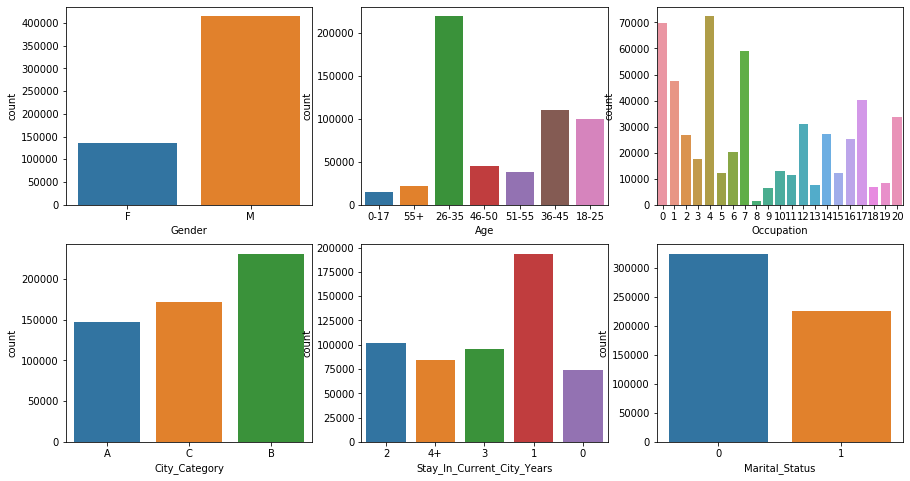

In [224]:
fig, axes = plt.subplots(2, 3, figsize = (15,8))
axes = axes.flatten()

for i in range(0,len(train.columns)-5):
    sns.countplot(train.iloc[:,i+2], data=train, ax=axes[i])
plt.show()

Inference:
    * Males have made more purchases as compared to females.
    * People of age between 26-35 buys the most.
    * People from occupation 0 and 4 makes the maximum purchase.
    * People who reside in city B buys the more that people from city A and city C.
    * Majority of the buyers have lived in the city for 1 year.
    * Umarried tends to buy more.

**Note that a particular category/group buys more does not guarantee that their average purchase value will also be high. This can easily be seen from the above two observations.**

#### Correlation 

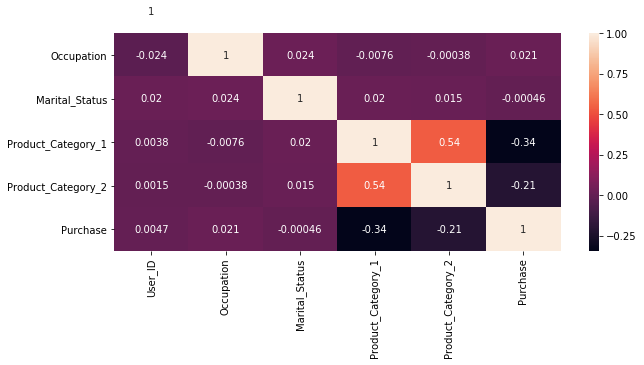

In [225]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),annot=True)
top,bottom=plt.ylim()
plt.ylim(top+0.5,bottom+0.5)
plt.show()

In [226]:
# Product category 1 and 2 seem to have a bit correlation.

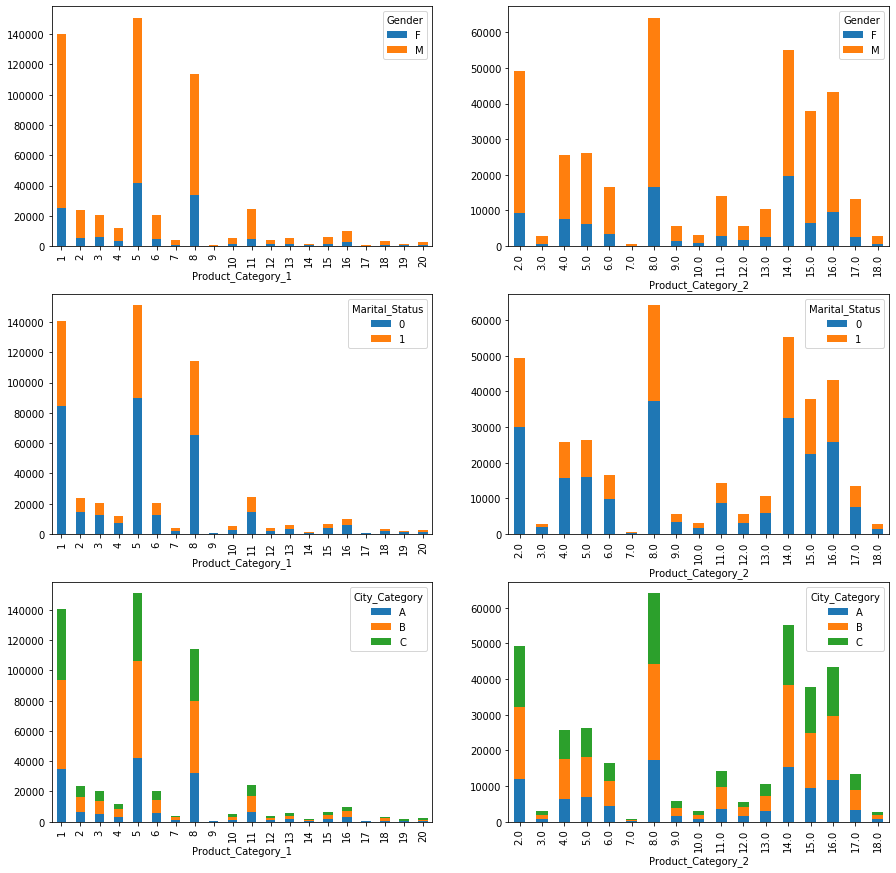

In [227]:
# Visual representation of what Product_Category_1, Product_Category_2 are prefered with respect to Gender, Marital status and city
fig,ax =plt.subplots(3,2,figsize=(15,15))
ax=ax.flatten()

pd.crosstab(train['Product_Category_1'],train['Gender']).plot(kind='bar',stacked=True,ax=ax[0])
pd.crosstab(train['Product_Category_2'],train['Gender']).plot(kind='bar',stacked=True,ax=ax[1])

pd.crosstab(train['Product_Category_1'],train['Marital_Status']).plot(kind='bar',stacked=True,ax=ax[2])
pd.crosstab(train['Product_Category_2'],train['Marital_Status']).plot(kind='bar',stacked=True,ax=ax[3])

pd.crosstab(train['Product_Category_1'],train['City_Category']).plot(kind='bar',stacked=True,ax=ax[4])
pd.crosstab(train['Product_Category_2'],train['City_Category']).plot(kind='bar',stacked=True,ax=ax[5])

plt.show()

In [228]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

### Data Prep-processing

In [229]:
# We will consider Stay_In_Current_City_Years =4+ as just 4.
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int64')

In [230]:
# Since age can be considered as ordinal we use label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['LE Age']=le.fit_transform(df.Age)

In [183]:
# Shows which label is given to which Age group
compare=pd.DataFrame(columns=['Label','Age'])
compare['Label']=df['LE Age'].value_counts().index
compare['Age']=df['Age'].value_counts().index
compare.sort_values(by='Label')

,Label,Age
6,0,0-17
2,1,18-25
0,2,26-35
1,3,36-45
3,4,46-50
4,5,51-55
5,6,55+


In [231]:
df=df.drop('Age',axis=1)

In [232]:
# Removing the the prefix 'P' from Product ID and converting it to an integer
df['Product_ID']=df['Product_ID'].str.lstrip('P').astype('int64')

In [233]:
# Changing the rest of the categorical data into numerical data.
df=pd.get_dummies(df,drop_first=True)
df.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,LE Age,Gender_M,City_Category_B,City_Category_C
0,1000001,69042,10,2,0,3,2.0,8370.0,0,0,0,0
1,1000001,248942,10,2,0,1,6.0,15200.0,0,0,0,0
2,1000001,87842,10,2,0,12,14.0,1422.0,0,0,0,0
3,1000001,85442,10,2,0,12,14.0,1057.0,0,0,0,0
4,1000002,285442,16,4,0,8,8.0,7969.0,6,1,0,1


In [235]:
# Splitting the data into train and test
df_train=df[0:550068]
df_test=df[550068:783668]

In [236]:
df_test=df_test.drop('Purchase',axis=1)

In [237]:
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_std=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_std=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

### Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr=LinearRegression()
lr.fit(X_train_std,y_train)
y_pred_test=lr.predict(X_test_std)


print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2 on the test data 0.1318594246925605
RMSE on the test data 4686.003004399269


### Decision Tree

In [253]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=500)
dt.fit(X_train, y_train)
y_pred_test=dt.predict(X_test)

print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2 on the test data 0.6784717452402509
RMSE on the test data 2851.787144176071


### Random Forest

In [241]:
rf = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100)
rf.fit(X_train,y_train)
y_pred_test=rf.predict(X_test)

print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))

<IPython.core.display.Javascript object>

R^2 on the test data 0.7123200727596055
RMSE on the test data 2697.505354348593


### Xg Boost

In [242]:
#!pip install xgboost

In [243]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

xgb= XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=10)
xgb.fit(X_train,y_train)

y_pred_test=xgb.predict(X_test)
print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))


R^2 on the test data 0.7489041615308366
RMSE on the test data 2520.155233719127


### Gradient boost

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   min_samples_leaf=500, min_samples_split=100)

GBoost.fit(X_train,y_train)
y_pred_test=GBoost.predict(X_test)

print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))


R^2 on the test data 0.6800661504377483
RMSE on the test data 2844.7075873522867


### LightGB

In [248]:
import lightgbm as lgb
LightGB = lgb.LGBMRegressor(objective='regression',num_leaves=500,
                              learning_rate=0.05, n_estimators=100,
                              bagging_fraction = 0.8,bagging_freq = 5,                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 100)

LightGB.fit(X_train,y_train)
y_pred_test=LightGB.predict(X_test)

print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))


R^2 on the test data 0.7243429872959799
RMSE on the test data 2640.5357879735006


### Ensemble - Voting

In [263]:
from sklearn.ensemble import VotingRegressor

# Giving more weight to the models which have performed well
VR=VotingRegressor(estimators=[('xgb',xgb),('rf',rf),('LightGB',LightGB)],weights=[5,2,1])
VR.fit(X_train,y_train)

y_pred_test=VR.predict(X_test)

print('R^2 on the test data', r2_score(y_test, y_pred_test))
print('RMSE on the test data', np.sqrt(mean_squared_error(y_test, y_pred_test)))


R^2 on the test data 0.7432059984000918
RMSE on the test data 2548.589988464799


If the RMSE's of different models are compared then the best score is given by Xg Boost (2520) implying this model is the best model to be able to predict purchase amount.